In [1]:
# 1. Выбрать задачу (классификация или регрессия), датасет (пересечений не должно быть - у каждого студента свой датасет)
# и метрику качества

# Регрессия, метрика R2
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter("ignore")
sns.set(style="darkgrid")
%matplotlib inline

In [2]:
url = "https://raw.githubusercontent.com/MaximZherlygin/CV/main/general_data.csv"
data = pd.read_csv(url)
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [3]:
data.shape

(4410, 24)

In [4]:
# 2. Сделать препроцессинг, фичеинжинириг и т.д. \\ разрешается использование любых пакетов
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [5]:
categorical = list(data.dtypes[data.dtypes == "object"].index)

a = data[categorical]
a = pd.get_dummies(a)
data = data.drop(columns=categorical)
data = data.join(a)

data.head()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,...,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y
0,51,6,2,1,1,1,131160,1.0,11,8,...,0,0,0,0,0,0,0,1,0,1
1,31,10,1,1,2,1,41890,0.0,23,8,...,0,0,0,1,0,0,0,0,1,1
2,32,17,4,1,3,4,193280,1.0,15,8,...,0,0,0,0,1,0,0,1,0,1
3,38,2,5,1,4,3,83210,3.0,11,8,...,0,0,0,0,0,0,0,1,0,1
4,32,10,1,1,5,1,23420,4.0,12,8,...,0,0,0,0,1,0,0,0,1,1


In [6]:
data.dtypes

Age                                    int64
DistanceFromHome                       int64
Education                              int64
EmployeeCount                          int64
EmployeeID                             int64
JobLevel                               int64
MonthlyIncome                          int64
NumCompaniesWorked                   float64
PercentSalaryHike                      int64
StandardHours                          int64
StockOptionLevel                       int64
TotalWorkingYears                    float64
TrainingTimesLastYear                  int64
YearsAtCompany                         int64
YearsSinceLastPromotion                int64
YearsWithCurrManager                   int64
Attrition_No                           uint8
Attrition_Yes                          uint8
BusinessTravel_Non-Travel              uint8
BusinessTravel_Travel_Frequently       uint8
BusinessTravel_Travel_Rarely           uint8
Department_Human Resources             uint8
Department

In [7]:
y = data["MonthlyIncome"]
X = data.drop(columns=["MonthlyIncome"])

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
numeric_features = data.select_dtypes(include=np.number).columns.tolist()
X_nf = data[numeric_features]
numeric_features = X_nf.columns
X_nf = X_nf.fillna(method='ffill')
X_nf.isna().mean()

X_train, X_test, y_train, y_test = train_test_split(X_nf, y, test_size=0.3, random_state=10)

In [10]:
def change(a):
    if np.isnan(a):
            return 0
    else:
        return a

for i in list(X_train.columns):
    X_test[i] = X_test[i].agg(change)
    X_train[i] = X_train[i].agg(change)
    y_train = y_train.agg(change)
    y_test = y_test.agg(change)

In [11]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

sc.fit(X_train)
X_train_sc = sc.transform(X_train)
X_test_sc  = sc.transform(X_test)

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

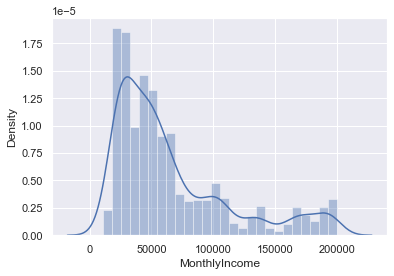

In [12]:
# 2*. Посчитать различные статистики, визуализировать данные и сделать первичные выводы \\ разрешается использование любых пакетов
sns.distplot(y_train)

In [13]:
# 3. Реализовать метрику качества \\ аргументировать выбор метрики качества
# Для наших задач достаточно коэффициента детерминации (r2)
def r2(real, predicted):
    SS_res = np.sum((predicted - real) ** 2)
    SS_tot = np.sum((real - np.mean(real)) ** 2)
    return 1 - SS_res / SS_tot

In [14]:
# 4. Реализовать и обучить логистическую регрессию или линейную регрессию \\ !!!не разрешается использовать sklearn!!!
def predict_y(x, weight, bias):
    return weight*x + bias

def cost_function(x, y, weight, bias):
    companies = len(x)
    total_error = 0.0
    for i in range(companies):
        total_error += (y[i] - (weight*x[i] + bias))**2
    return total_error / companies

In [15]:
def update_weights(x, y, weight, bias, learning_rate):
    weight_deriv = 0
    bias_deriv = 0
    companies = len(x)

    for i in range(companies):
        weight_deriv += -2*x[i] * (y[i] - (weight*x[i] + bias))
        bias_deriv += -2*(y[i] - (weight*x[i] + bias))

    weight -= (weight_deriv / companies) * learning_rate
    bias -= (bias_deriv / companies) * learning_rate
    return weight, bias

In [16]:
def train(x, y, weight, bias, learning_rate, iters):
    cost_history = []
    for i in range(iters):
        weight,bias = update_weights(x, y, weight, bias, learning_rate)
        cost = cost_function(x, y, weight, bias)
        cost_history.append(cost)
        if i % 10 == 0:
            print(f"iter={i}\nweight={weight}\nbias={bias}\ncost={cost}")
    return weight, bias, cost_history

In [17]:
x = X_train_sc
y = y_train.values
for i in range(len(x)):
    for k in range(len(x[i])):
        if np.isnan(x[i][k]):
            x[i][k] = 0
for i in range(len(y)):
    if np.isnan(y[i]):
            y[i] = 0
weight = 0
bias = 0
lr = 0.01
iters = 100
weight, bias, cost_history = train(x, y, weight, bias, lr, iters)

iter=0
weight=[-46.3939545  -17.72558068   3.30615686   0.           9.16154073
  57.86817281 950.26021988 -12.7734305   -6.48794284   0.
   1.1047718  -38.31583712  60.08493801  -3.33021505  48.68004493
  17.31737505  23.74512498 -23.74512498  53.17753372 -29.99013811
  -9.59114544 -31.87393925  60.64570097 -48.6809204  -15.08581673
 -15.83259782 -44.29287558  35.46707343  15.3134376   13.35268011
  -3.15635312   3.15635312 -31.05473749 -45.92095593  10.61341946
 -14.61723991  33.4863664   15.85076113  -7.49245265  17.69323099
  -4.58647202  13.97128352  37.87236362 -52.98102212   0.        ]
bias=[1308.49083252 1308.49083252 1308.49083252 1308.49083252 1308.49083252
 1308.49083252 1308.49083252 1308.49083252 1308.49083252 1308.49083252
 1308.49083252 1308.49083252 1308.49083252 1308.49083252 1308.49083252
 1308.49083252 1308.49083252 1308.49083252 1308.49083252 1308.49083252
 1308.49083252 1308.49083252 1308.49083252 1308.49083252 1308.49083252
 1308.49083252 1308.49083252 1308.49083

In [17]:
# 4*. Добавить регуляризацию \\ не разрешается использовать sklearn

In [25]:
# 5. Оценить качество модели на обучающей и тестовой выборках \\ не разрешается использовать sklearn

x = X_test_sc
y = y_test.values
for i in range(len(x)):
    for k in range(len(x[i])):
        if np.isnan(x[i][k]):
            x[i][k] = 0
for i in range(len(y)):
    if np.isnan(y[i]):
            y[i] = 0
predict_y (x, weight, bias)

array([[60886.61787721, 57431.03897182, 56900.80310339, ...,
        55243.86343726, 53391.37868663, 56747.96797109],
       [54956.03537872, 57431.03897182, 56760.38582559, ...,
        55243.86343726, 53391.37868663, 56747.96797109],
       [57152.54741519, 57431.03897182, 56479.55127   , ...,
        58541.56989744, 58320.87018099, 56747.96797109],
       ...,
       [55614.98898966, 56769.04492532, 56900.80310339, ...,
        55243.86343726, 58320.87018099, 56747.96797109],
       [53198.82574953, 55350.48625426, 56760.38582559, ...,
        55243.86343726, 53391.37868663, 56747.96797109],
       [54077.43056413, 57431.03897182, 56900.80310339, ...,
        55243.86343726, 58320.87018099, 56747.96797109]])

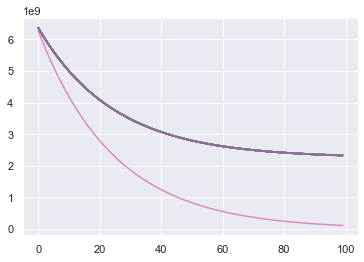

In [19]:
# 5*. Сделать график ошибки модели на обучающей и тестовой выборках 
# 5*. Сделать график точности модели на обучающей и тестовой выборках
plt.plot(cost_history)
plt.grid(True)
plt.show()

In [20]:
# 6. Обучить логистическую регрессию или линейную регрессию из sklearn, оценить качество модели на 
# обучающей и тестовой выборках и сравнить со своей моделью
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

lr = linear_model.LinearRegression()
lr.fit(X_train_sc, y_train)
print ("LinearRegression:", lr.score(X_test_sc, y_test))
print ("LR RMSE:", np.sqrt(mean_squared_error(lr.predict(X_test_sc), y_test)))

LinearRegression: 1.0
LR RMSE: 1.2002817487756454e-10


In [21]:
# 6*. Сделать график ошибки модели из sklearn на обучающей и тестовой выборках и сравнить со своей моделью
# 6*. Сделать график точности модели из sklearn на обучающей и тестовой выборках и сравнить со своей моделью

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

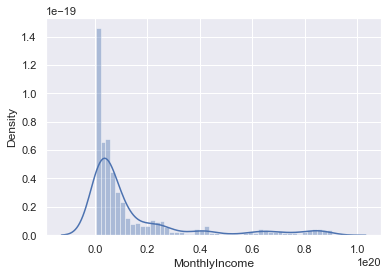

In [21]:
error = (y_train - lr.predict(X_train)) ** 2
sns.distplot(error)

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

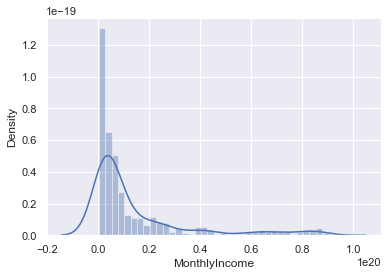

In [22]:
error = (y_test - lr.predict(X_test)) ** 2
sns.distplot(error)